## Exploring Credit Card Data & Fraud Detection:

##### Before we start, essential information on the original data set: 

* The transactions occurred in 2 days.
* It contains only numerical input variables which are the result of a PCA transformation.
* Due to confidentiality issues, original feature labels have been removed besides Amount, Time, and Class.

In [1]:
import pandas as pd 
df = pd.read_csv('data/raw/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [2]:
# let's check duplicates
print(df.shape)
print(df.duplicated().sum())

# considering the column labels are ambigious,  I cannot identify whether these repetitions are logical or not! 
# Since I cannot confirm their uniqueness, I'll be dropping them.
df.drop_duplicates(inplace=True)
print(df.shape)


(284807, 31)
1081
(283726, 31)


In [3]:
df[df.isnull().any(axis=1)].shape
# this confirms there's no nulls in the dataset

(0, 31)

In [4]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
print(df[(df['Time']<0)].shape[0])
print(df[(df['Amount']<0)].shape[0])
print(df['Class'].value_counts())

0
0
Class
0    283253
1       473
Name: count, dtype: int64


#### Checking skew and distribution:

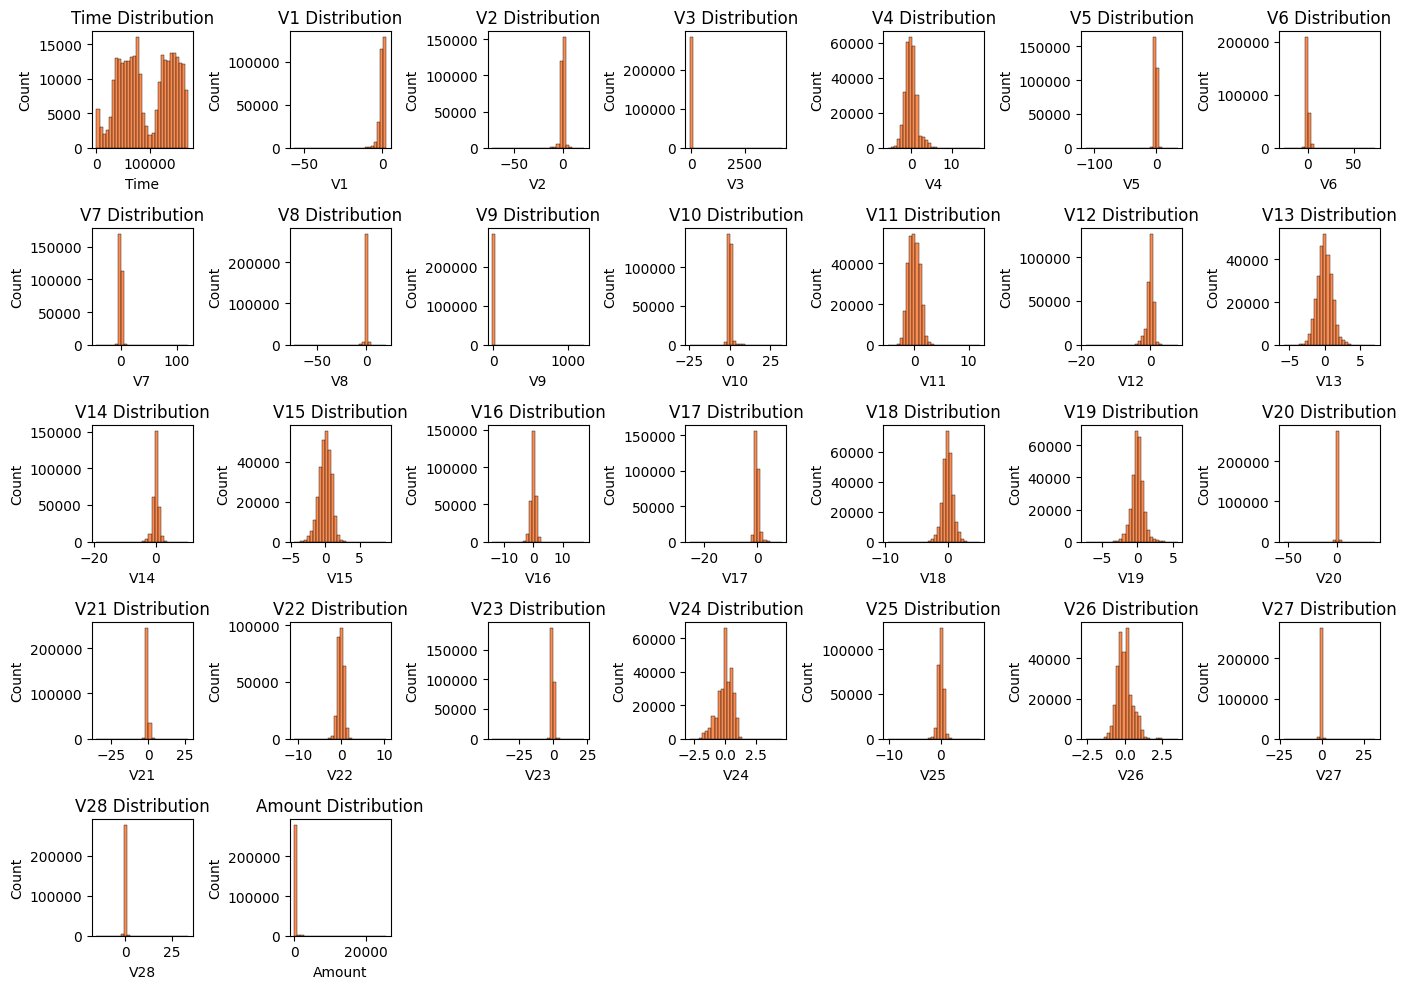

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

vars_to_plot = df.columns.drop('Class')
n = len(vars_to_plot)
cols = 7
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(cols*2, rows*2))
axes = axes.flatten()

for i, var in enumerate(vars_to_plot):
    sns.histplot(df[var], ax=axes[i], color="#F96718", bins=30)
    axes[i].set_title(f'{var} Distribution', fontsize=12)

# Turn off unused axes
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


#### Looking at the spread of this data, I can't see any significant skew. Thus, there is no need for robust scaling, we can do standard scaling.

In [8]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train =  scaler.fit_transform(X_train)
X_test =  scaler.transform(X_test)

In [11]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline as SKPipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler, InstanceHardnessThreshold
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import cross_val_predict

RANDOM_STATE = 42
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Define classifier (match paper hyperparams if provided)
clf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE, n_jobs=-1)

# scoring: paper uses F1 for non-majority class (minority F1)
f1_minority = make_scorer(f1_score, pos_label=1)

# 1) Baseline: unbalanced (no sampler) - use sklearn pipeline with scaler
pipe_unbalanced = SKPipeline([
    ('scaler', StandardScaler()),
    ('clf', clf)
])

# 2) Random undersampling
rus = RandomUnderSampler(sampling_strategy='auto', random_state=RANDOM_STATE)
pipe_rus = ImbPipeline([
    ('scaler', StandardScaler()),   # scaling before or after sampler usually ok; keep consistent
    ('rus', rus),
    ('clf', clf)
])

# 3) Instance Hardness Threshold (IHT)
# You can pass an estimator to IHT; we'll use a small random forest to compute hardness.
iht_sampler = InstanceHardnessThreshold(estimator=RandomForestClassifier(n_estimators=50, random_state=RANDOM_STATE),
                                        sampling_strategy='auto',
                                        random_state=RANDOM_STATE,
                                        cv=5,
                                        n_jobs=-1)
pipe_iht = ImbPipeline([
    ('scaler', StandardScaler()),
    ('iht', iht_sampler),
    ('clf', clf)
])

pipelines = {
    'unbalanced': pipe_unbalanced,
    'random_undersample': pipe_rus,
    'IHT': pipe_iht
}

results = {}
for name, pipe in pipelines.items():
    scores = cross_val_score(pipe, X, y, scoring=f1_minority, cv=cv, n_jobs=-1)
    results[name] = {'mean_f1': scores.mean(), 'std_f1': scores.std(), 'folds': scores}
    print(f"{name}: mean F1={scores.mean():.4f} ± {scores.std():.4f}  folds={scores}")

# Compute percent improvement of IHT over unbalanced (if needed)
base = results['unbalanced']['mean_f1']
iht = results['IHT']['mean_f1']
pct_improvement = 100.0 * (iht - base) / base
print(f"IHT vs unbalanced: {pct_improvement:.2f}% improvement")


unbalanced: mean F1=0.8525 ± 0.0167  folds=[0.87150838 0.85714286 0.82142857 0.85875706 0.85380117]
random_undersample: mean F1=0.1063 ± 0.0078  folds=[0.09341587 0.11666667 0.11140236 0.10487353 0.10494572]
IHT: mean F1=0.8024 ± 0.0300  folds=[0.83076923 0.82722513 0.75126904 0.78606965 0.81675393]
IHT vs unbalanced: -5.88% improvement
